In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline
pd.set_option('display.max_columns',500)

In [1]:
!pip install flaml

  Using cached FLAML-1.0.13-py3-none-any.whl (205 kB)


# Reading the clean and merged Dataset

In [69]:
df=pd.read_csv(r'C:/Users/Ankita/OneDrive - Infiniti Research/Desktop/Johnson&Johnson/final_data_SC_scores.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (74,91,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [70]:
df.shape

(14356, 130)

In [71]:
df.isnull().sum()

date                         0
asin                         0
year                         0
weeknum                      0
fiscal_year                  0
                         ...  
qna_answered                 0
summary_pr_translated    12356
text_pr_translated       12328
text_sentiment_sc            0
summary_sentiment_sc         0
Length: 130, dtype: int64

In [72]:
df.head()

date        asin  year  weeknum  fiscal_year  fiscal_month  \
0  20-12-2020  B000W6PY1W  2020       51         2020            12   
1  20-12-2020  B071936B11  2020       51         2020            12   
2  20-12-2020  B075KJBF9H  2020       51         2020            12   
3  20-12-2020  B07BVW522M  2020       51         2020            12   
4  20-12-2020  B07JMXSSYN  2020       51         2020            12   

   first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          14.7                               12.91   

   first_party_ordered_units_vc  average_sales_price_vc  \
0                            59                     3.6   
1                            14                    12.4   
2                            18                    15.9   
3                            25                     8.0   
4                             1                    12.9   

   first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
0                         33.95                   47.67   
1                        119.85                  107.40   
2                         59.05                   59.44   
3                        127.91                  145.28   
4                         38.73                   34.07   

   first_party_shipped_units_vc  customer_return_vc  free_replacements_vc  \
0                             9                   0                     0   
1                            10                   0                     0   
2                             4                   0                     0   
3                            16                   0                     0   
4                             3                   0                     0   

   preordered_revenue_amount_vc  preordered_units_vc  \
0                             0                  0.0   
1                             0                  0.0   
2                             0                  0.0   
3                             0                  0.0   
4                             0                  0.0   

   shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
0                              550.0                              172.0   
1                              165.0                              289.0   
2                              343.0                             2246.0   
3                              151.0                              209.0   
4                              505.0                             1148.0   

   replenishable_out_of_stock_vc  lost_buy_box_vc  glance_views_vc  \
0                         0.0000            0.000              362   
1                         0.0000            0.012               83   
2                         0.0000            0.000              114   
3                         0.0144            0.003              341   
4                         0.0000            0.000               19   

   conversion_rate_vc  net_received_amount_vc  net_received_units_vc  \
0              0.1630                     0.0                    0.0   
1              0.1687                     0.0                    0.0   
2              0.1579                     0.0                    0.0   
3              0.0733                     0.0                    0.0   
4              0.0526                     0.0                    0.0   

   open_purchase_order_quantity_vc  inventory_sell_through_rate_vc  \
0                              0.0                             0.0   
1                              0.0                             0.0   
2                              0.0                             0.0   
3                              0.0                          

In [73]:
df.describe()

year       weeknum   fiscal_year  fiscal_month  \
count  14356.000000  14356.000000  14356.000000  14356.000000   
mean    2021.329479     22.509264   2021.321120      5.721649   
std        0.509305     14.790693      0.515833      3.415902   
min     2020.000000      0.000000   2020.000000      1.000000   
25%     2021.000000     10.000000   2021.000000      3.000000   
50%     2021.000000     20.000000   2021.000000      5.000000   
75%     2022.000000     34.000000   2022.000000      9.000000   
max     2022.000000     52.000000   2022.000000     12.000000   

       first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
count                  14356.000000                        14356.000000   
mean                     203.264830                          169.353275   
std                      258.122373                          214.909334   
min                     -705.700000                         -579.740000   
25%                       57.300000                           47.820000   
50%                      133.000000                          110.780000   
75%                      278.175000                          231.717500   
max                     6150.700000                         5104.840000   

       first_party_ordered_units_vc  average_sales_price_vc  \
count                  14356.000000            14013.000000   
mean                      31.127682                7.169193   
std                       47.928680                4.743424   
min                     -154.000000               -4.600000   
25%                        7.000000                4.000000   
50%                       18.000000                4.200000   
75%                       38.000000                8.600000   
max                     1107.000000               28.200000   

       first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
count                   14356.00000            14356.000000   
mean                      159.93225              169.353063   
std                       190.46126              215.807587   
min                         0.00000                0.000000   
25%                        41.60000               42.020000   
50%                        99.84000              101.535000   
75%                       221.64750              225.420000   
max                      4190.94000             3826.220000   

       first_party_shipped_units_vc  customer_return_vc  free_replacements_vc  \
count                  14356.000000        14356.000000          14356.000000   
mean                      29.507593            0.481610              0.094316   
std                       40.249814            2.317684              0.383961   
min                        0.000000            0.000000              0.000000   
25%                        7.000000            0.000000              0.000000   
50%                       16.000000            0.000000              0.000000   
75%                       36.000000            1.000000              0.000000   
max                      839.000000          144.000000              7.000000   

       preordered_revenue_amount_vc  preordered_units_vc  \
count                       14356.0              11383.0   
mean                            0.0                  0.0   
std                             0.0                  0.0   
min                             0.0                  0.0   
25%                             0.0                  0.0   
50%                             0.0                  0.0   
75%                             0.0                  0.0   
max                             0.0                  0.0   

       shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
count                       13803.000000                       14269.000000   
mean                          349.906035                         553.816946   
std                           422.935924                         599.426858   
min                           

In [74]:
# drop preordered_revenue_amount_vc
#dropping variables with 0 or close to 0 variance

df.drop(['preordered_revenue_amount_vc','preordered_units_vc','lost_buy_box_vc',
        'inventory_sell_through_rate_vc','add_on_item_pr','prime_exclusive_pr','author_artist_vc',
        'compliance_manually_changed_pr','text_pr_translated','summary_pr_translated'],axis=1,inplace=True)

In [75]:
df.shape

(14356, 120)

# Checking Missing Values and Outliers

In [15]:
miss=df.isnull().sum()/len(df)

In [21]:
with pd.option_context("display.max_rows", None):
    display(miss)

date                                                                          0.000000
asin                                                                          0.000000
year                                                                          0.000000
weeknum                                                                       0.000000
fiscal_year                                                                   0.000000
fiscal_month                                                                  0.000000
first_party_ordered_sales_vc                                                  0.000000
first_party_ordered_sales_local_vc                                            0.000000
first_party_ordered_units_vc                                                  0.000000
average_sales_price_vc                                                        0.023892
first_party_shipped_sales_vc                                                  0.000000
shipped_cogs_amount_vc                     

Dropping Varibales with more than 50% of missing values

In [76]:
df.drop(['promotion_price_pr','promo_type_pr','unique_pr','manufacturer_comment_pr',
        'has_image_pr'],axis=1,inplace=True)

In [77]:
df.shape

(14356, 115)

In [78]:
#dropping variables which are irrelevant
df.drop(['brand_code_vc','brand_vc','parent_manufacturer_code_vc','manufacturer_code_vc'],axis=1,inplace=True)

In [79]:
df.shape

(14356, 111)

# Automated EDA

In [25]:
!pip install sweetviz

  Using cached sweetviz-2.1.4-py3-none-any.whl (15.1 MB)
  Using cached importlib_resources-5.10.0-py3-none-any.whl (34 kB)


In [26]:
import sweetviz as sv

In [80]:
df=df.drop(['clothing_size_vc','model_style_number_vc'],axis=1)

In [30]:
df.columns

Index(['date', 'asin', 'year', 'weeknum', 'fiscal_year', 'fiscal_month',
       'first_party_ordered_sales_vc', 'first_party_ordered_sales_local_vc',
       'first_party_ordered_units_vc', 'average_sales_price_vc',
       ...
       'critical_pr', 'customer_product_pr', 'star_rating_pr',
       'item_to_consider', 'useful_ratings_negative',
       'useful_ratings_positive', 'feature_wise_rating', 'qna_answered',
       'text_sentiment_sc', 'summary_sentiment_sc'],
      dtype='object', length=109)

In [81]:
df['colour_vc'].replace({'UNKNOWN':'-','Blau':'Black', 'blau':'Black', 'white':'White'},inplace=True)
#df['clothing_size_vc'].replace({'UNKNOWN':'-'},inplace=True)

In [33]:
eda=sv.analyze(df)
eda.show_html('eda.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\ProgramData\Anaconda3\lib\site-packages\sweetviz\graph_associations.py:219: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_dataframe[feature] = pd.Series(dtype=float)


Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From the Automated EDA, the following are the observations;

1. NUMERICAL ASSOCIATIONS
(PEARSON, -1 to 1)
conversion_rate_vc1.00
first_party_ordered_units_vc0.47
first_party_ordered_sales_vc0.40
first_party_ordered_sales_local_vc0.40
regular_price_pr-0.30
first_party_shipped_units_vc0.29
unfilled_customer_ordered_units_vc0.27
average_sales_price_vc-0.27
shipped_cogs_amount_vc0.23
unsellable_on_hand_units_vc0.22
first_party_shipped_sales_vc0.21
cumulative_5_star_reviews_pr0.21
ordered_subcategory_sales_rank_vc-0.20
sellable_on_hand_units_vc0.20


2. CATEGORICAL ASSOCIATIONS
(CORRELATION RATIO, 0 to 1)
match_type_pr0.74
asin0.41
parent_asin_vc0.39
qna_answered0.30
list_price_vc0.26
number_of_images_pr0.18
gsr_level_20.18
prep_instructions_required_vc0.18
third_party_seller_pr0.18
useful_ratings_positive0.17
ean_vc0.17
first_party_won_buy_box_pr0.17
ex_rate0.16
prep_instructions_vendor_state_vc0.15


Dropping Categorical Features which are irrelevant since they dont have more than 1 category


In [82]:
df_categorical = df.select_dtypes(include='object')
df_categorical.shape

(14356, 45)

In [83]:
df_categorical.head()

date        asin      gsr_level_2 isavc_vc isprofitero_pr  \
0  20-12-2020  B000W6PY1W  Acne Treatments      Yes            Yes   
1  20-12-2020  B071936B11        Cleansers      Yes            Yes   
2  20-12-2020  B075KJBF9H     Moisturisers      Yes            Yes   
3  20-12-2020  B07BVW522M     Moisturisers      Yes            Yes   
4  20-12-2020  B07JMXSSYN        Cleansers      Yes            Yes   

  first_party_ordered_sales_currency_code_vc  \
0                                        USD   
1                                        USD   
2                                        USD   
3                                        USD   
4                                        USD   

  first_party_ordered_sales_local_currency_code_vc  \
0                                              EUR   
1                                              EUR   
2                                              EUR   
3                                              EUR   
4                                              EUR   

  first_party_shipped_sales_currency_code_vc shipped_cogs_currency_code_vc  \
0                                        EUR                           EUR   
1                                        EUR                           EUR   
2                                        EUR                           EUR   
3                                        EUR                           EUR   
4                                        EUR                           EUR   

  preordered_revenue_currency_code_vc net_received_amount_currency_code_vc  \
0                                 EUR                                  EUR   
1                                 EUR                                  EUR   
2                                 EUR                                  EUR   
3                                 EUR                                  EUR   
4                                 EUR                                  EUR   

  sellable_on_hand_inventory_currency_code_vc  \
0                                         EUR   
1                                         EUR   
2                                         EUR   
3                                         EUR   
4                                         EUR   

  sellable_on_hand_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                 
1                                                EUR                 
2                                                EUR                 
3                                                EUR                 
4                                                EUR                 

  unsellable_on_hand_inventory_currency_code_vc  \
0                                           EUR   
1                                           EUR   
2                                           EUR   
3                                           EUR   
4                                           EUR   

  unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                   
1                                                EUR                   
2                                                EUR                   
3                                                EUR                   
4                                                EUR                   

  aged_90_plus_days_sellable_inventory_currency_code_vc  \
0                                                EUR      
1                                                EUR      
2                                                EUR      
3                                                EUR      
4                                                EUR      

  aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc  \
0                                                EUR                           
1                                                EUR             

In [84]:
#Dropping all irrelavant categorical features since they have 0 unique values

df_categorical.drop(['first_party_ordered_sales_currency_code_vc',
                   'first_party_ordered_sales_local_currency_code_vc',
                    'first_party_shipped_sales_currency_code_vc',
                    'shipped_cogs_currency_code_vc','preordered_revenue_currency_code_vc',
                     'net_received_amount_currency_code_vc',
                     'sellable_on_hand_inventory_currency_code_vc',
                     'sellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
                    'unsellable_on_hand_inventory_currency_code_vc',
                    'unsellable_on_hand_amount_trailing_30_day_average_currency_code_vc',
                    'aged_90_plus_days_sellable_inventory_currency_code_vc',
                    'aged_90_plus_days_sellable_amount_trailing_30_day_average_currency_code_vc',
                    'unhealthy_inventory_currency_code_vc','selling_program_name_vc',
                     'isbn_13_vc','binding_vc','local_currency',
                      'target_currency','match_type_pr','type_pr','isavc_vc',
                     'isprofitero_pr','sitb_vc','parent_asin_vc','prime_pantry_pr',
                    'critical_pr'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [86]:
df_categorical.shape

(14356, 19)

In [85]:
df_numerical=df.select_dtypes(exclude='object')
df_numerical.shape

(14356, 64)

In [87]:
df_numerical.head()

year  weeknum  fiscal_year  fiscal_month  first_party_ordered_sales_vc  \
0  2020       51         2020            12                         240.7   
1  2020       51         2020            12                         197.6   
2  2020       51         2020            12                         326.9   
3  2020       51         2020            12                         227.5   
4  2020       51         2020            12                          14.7   

   first_party_ordered_sales_local_vc  first_party_ordered_units_vc  \
0                              210.85                            59   
1                              173.04                            14   
2                              286.26                            18   
3                              199.25                            25   
4                               12.91                             1   

   average_sales_price_vc  first_party_shipped_sales_vc  \
0                     3.6                         33.95   
1                    12.4                        119.85   
2                    15.9                         59.05   
3                     8.0                        127.91   
4                    12.9                         38.73   

   shipped_cogs_amount_vc  first_party_shipped_units_vc  customer_return_vc  \
0                   47.67                             9                   0   
1                  107.40                            10                   0   
2                   59.44                             4                   0   
3                  145.28                            16                   0   
4                   34.07                             3                   0   

   free_replacements_vc  shipped_subcategory_sales_rank_vc  \
0                     0                              550.0   
1                     0                              165.0   
2                     0                              343.0   
3                     0                              151.0   
4                     0                              505.0   

   ordered_subcategory_sales_rank_vc  replenishable_out_of_stock_vc  \
0                              172.0                         0.0000   
1                              289.0                         0.0000   
2                             2246.0                         0.0000   
3                              209.0                         0.0144   
4                             1148.0                         0.0000   

   glance_views_vc  conversion_rate_vc  net_received_amount_vc  \
0              362              0.1630                     0.0   
1               83              0.1687                     0.0   
2              114              0.1579                     0.0   
3              341              0.0733                     0.0   
4               19              0.0526                     0.0   

   net_received_units_vc  open_purchase_order_quantity_vc  \
0                    0.0                              0.0   
1                    0.0                              0.0   
2                    0.0                              0.0   
3                    0.0                              0.0   
4                    0.0                              0.0   

   sellable_on_hand_inventory_amount_vc  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
0  

In [88]:
df_numerical.item_to_consider.value_counts()

1    13348
0     1008
Name: item_to_consider, dtype: int64

In [89]:
df_numerical.free_replacements_vc.value_counts()

0    13293
1      871
2      132
3       34
4       15
5       10
7        1
Name: free_replacements_vc, dtype: int64

In [90]:
df_categorical.columns

Index(['date', 'asin', 'gsr_level_2', 'availability_pr',
       'third_party_seller_pr', 'product_group_vc', 'replenishment_code_vc',
       'colour_vc', 'prep_instructions_required_vc',
       'prep_instructions_vendor_state_vc', 'sponsored_pr',
       'third_party_only_pr', 'amazon_choice_pr', 'amazon_bestseller_pr',
       'amazon_subscribe_and_save_pr', 'amazon_prime_pr',
       'amazon_addon_item_pr', 'condition_pr', 'customer_product_pr'],
      dtype='object')

In [91]:
#Some features are categorical and have been wrongly identified in numerical data frame. Finally, 
#Adding all categorical features together in categorical df and dropping those from numerical df.

df_categorical=df[['date', 'asin', 'gsr_level_2', 'availability_pr',
       'third_party_seller_pr', 'product_group_vc', 'replenishment_code_vc',
       'colour_vc', 'prep_instructions_required_vc',
       'prep_instructions_vendor_state_vc', 'sponsored_pr',
       'third_party_only_pr', 'amazon_choice_pr', 'amazon_bestseller_pr',
       'amazon_subscribe_and_save_pr', 'amazon_prime_pr',
       'amazon_addon_item_pr', 'condition_pr', 'customer_product_pr','free_replacements_vc','first_party_won_buy_box_pr',
        'colour_count_vc','number_of_images_pr','isinventory_vc','issales_vc',
        'useful_ratings_negative','useful_ratings_positive','feature_wise_rating',
        'qna_answered','item_to_consider']]

In [92]:
df_categorical.shape

(14356, 30)

Dropping all variables added in categorical df in numerical columns

In [93]:
df_numerical.drop(['free_replacements_vc','first_party_won_buy_box_pr',
        'colour_count_vc','number_of_images_pr','isinventory_vc','issales_vc',
        'useful_ratings_negative','useful_ratings_positive','feature_wise_rating',
        'qna_answered','item_to_consider'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [94]:
df_categorical.shape,df_numerical.shape

((14356, 30), (14356, 53))

In [95]:
df_categorical.issales_vc.value_counts()

True    14356
Name: issales_vc, dtype: int64

Dropping is_sales_vc because it has only 1 category and has no relevance to the model

In [96]:
df_categorical.drop('issales_vc',axis=1,inplace=True)

In [97]:
df_categorical.shape

(14356, 29)

In [98]:
df_numerical.shape

(14356, 53)

# Data Pre-processing

Missing Value Imputation and Outlier Treatment

In [99]:
#Handling Missings & Outliers

def missing_num(x):
    x[x==999] = np.nan
    x = x.fillna(x.median())
    return x

#Handling Outliers
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95), lower =x.quantile(0.05) )
    return x

In [100]:
df_numerical=df_numerical.apply(missing_num)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


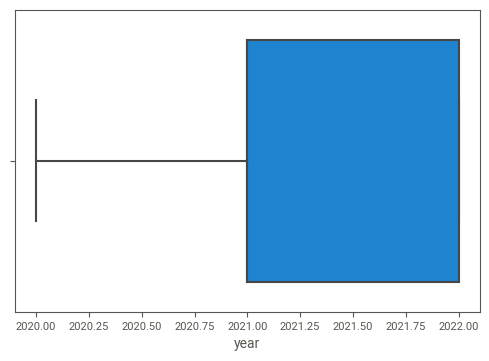

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


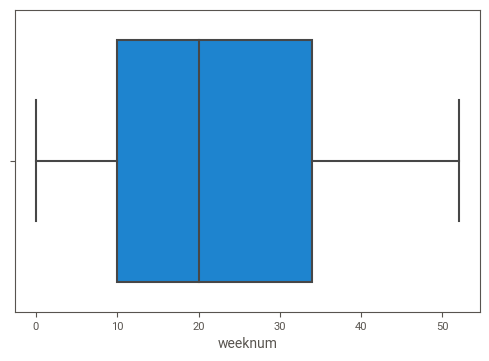

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


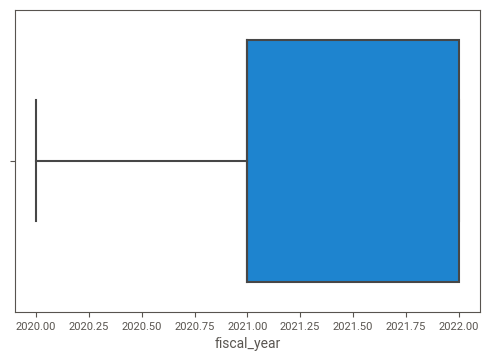

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


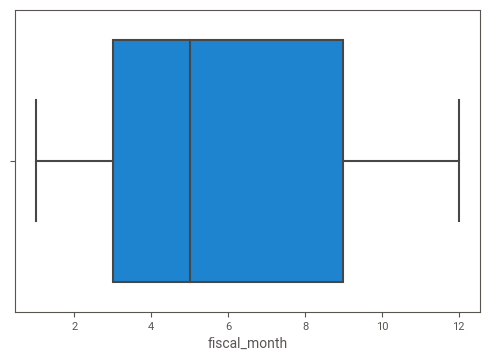

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


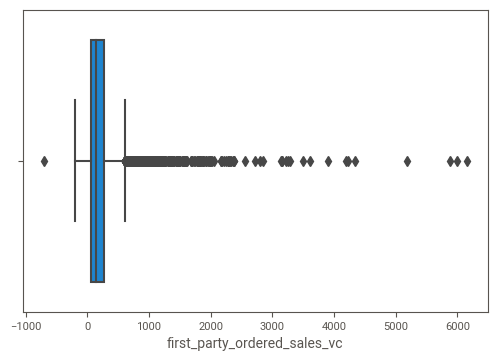

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


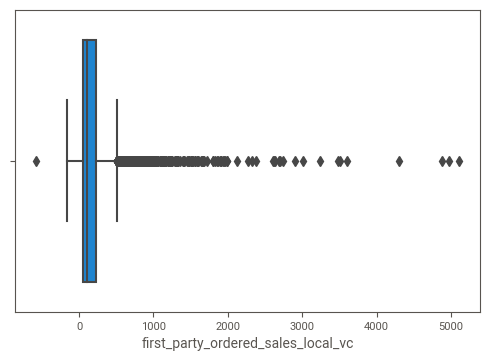

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


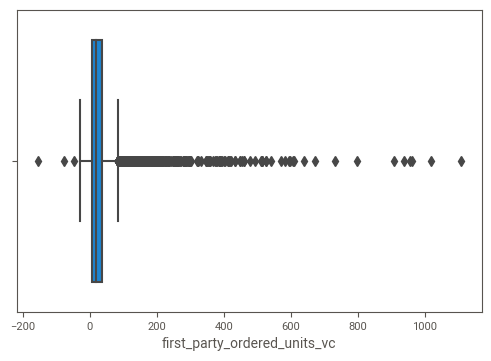

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


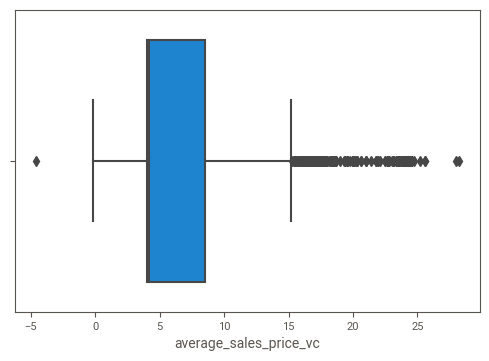

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


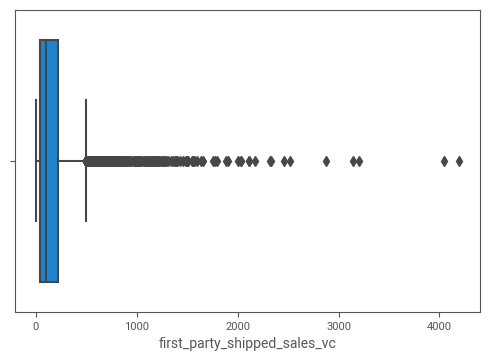

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


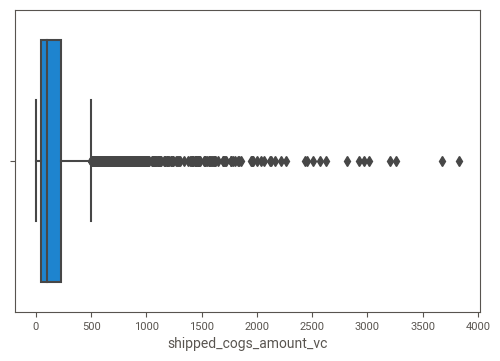

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


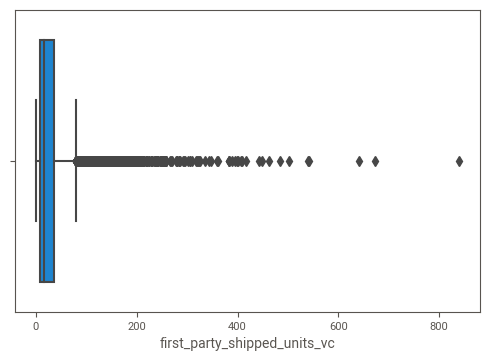

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


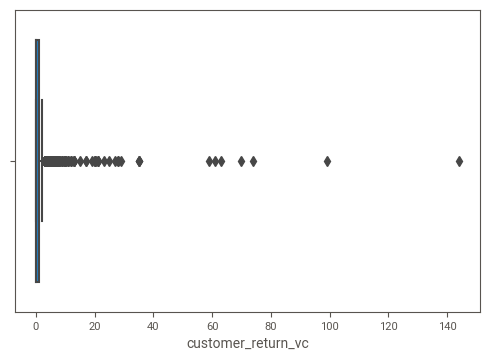

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


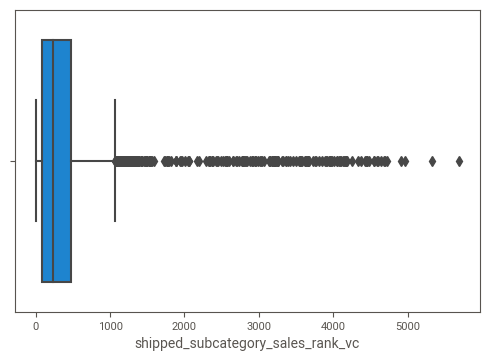

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


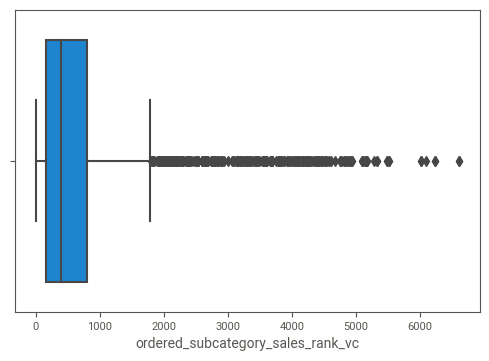

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


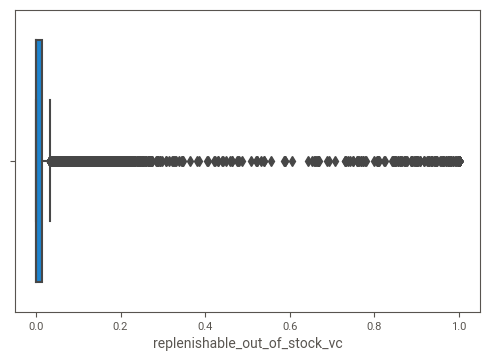

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


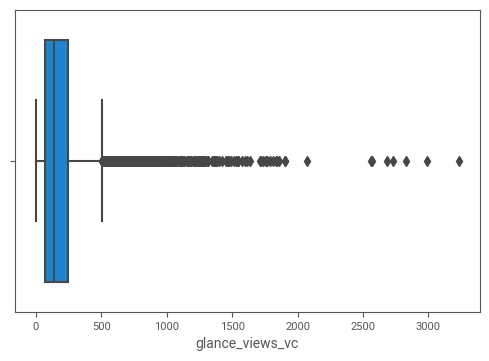

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


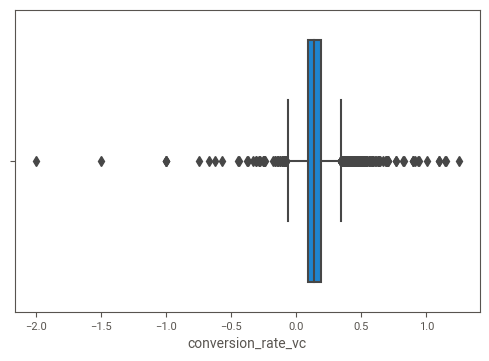

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


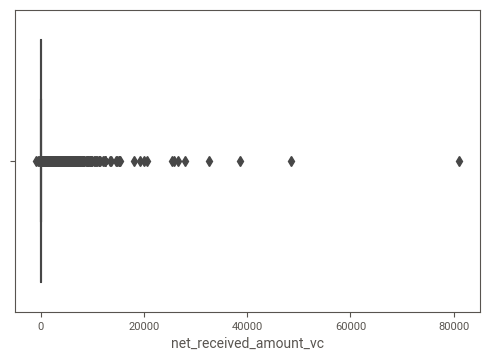

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


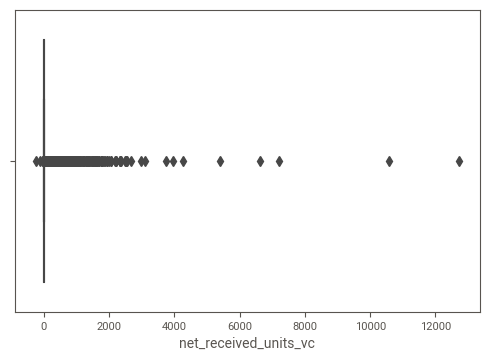

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


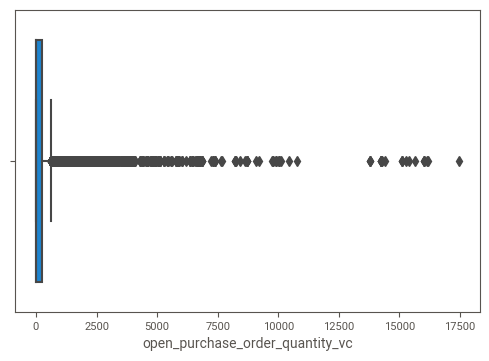

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


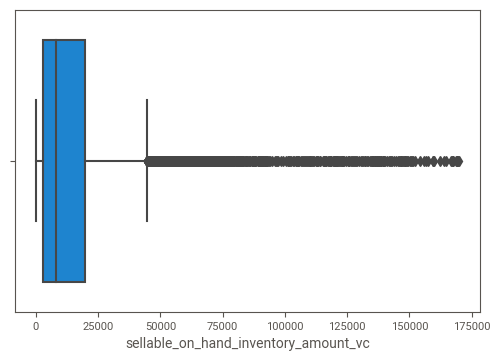

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


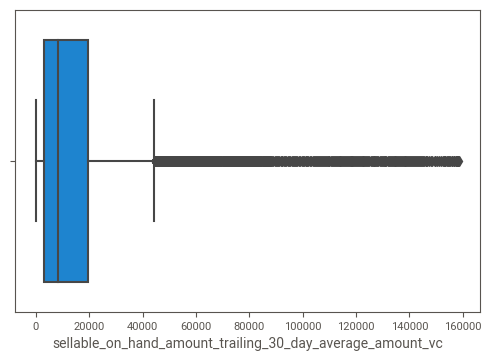

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


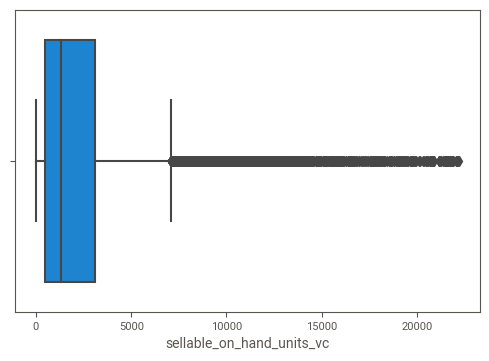

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


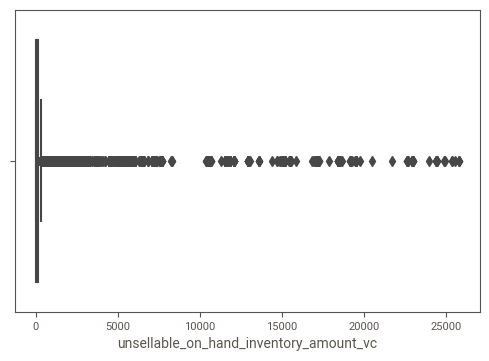

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


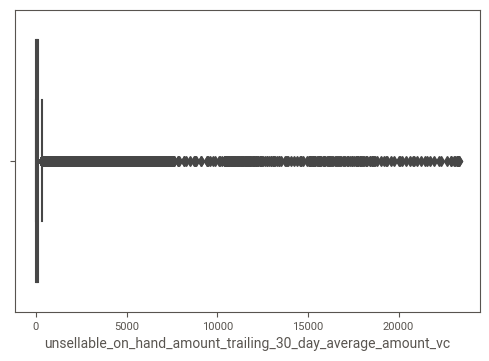

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


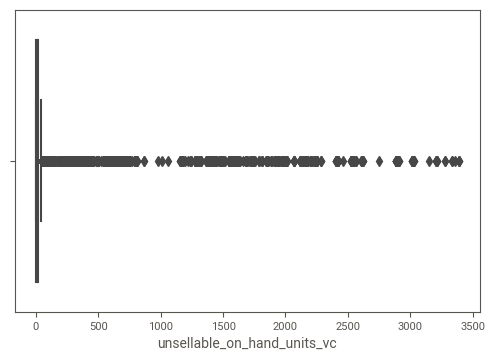

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


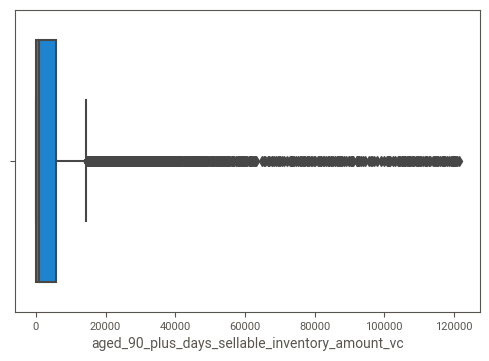

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


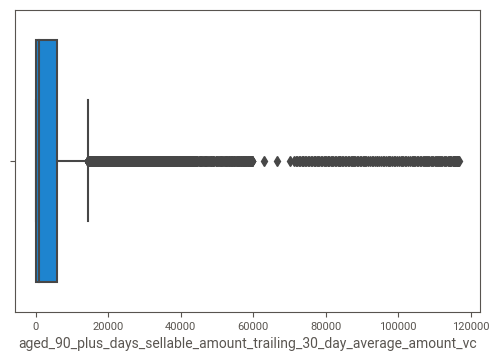

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


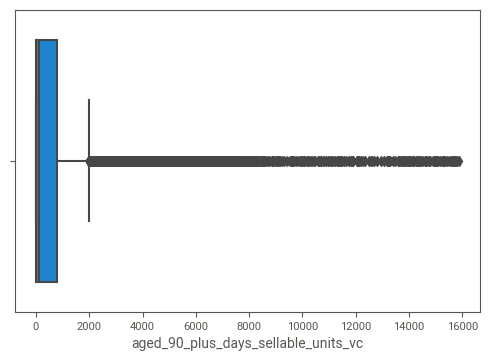

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


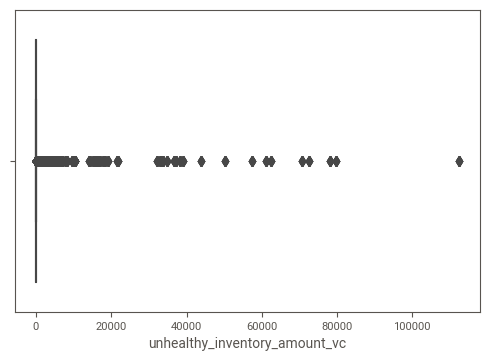

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


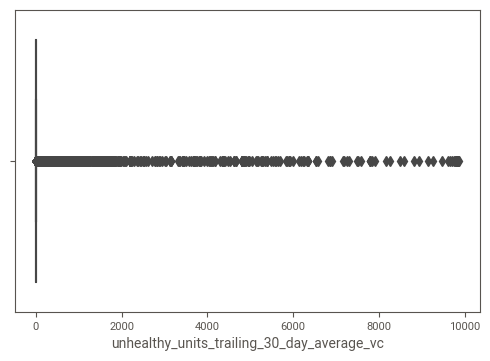

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


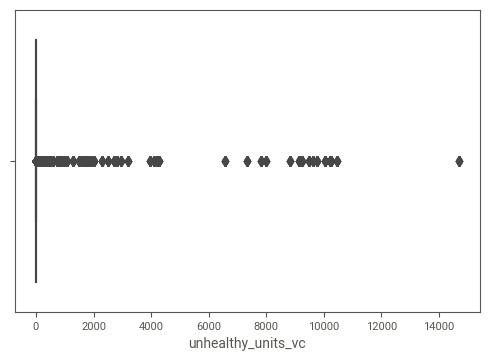

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


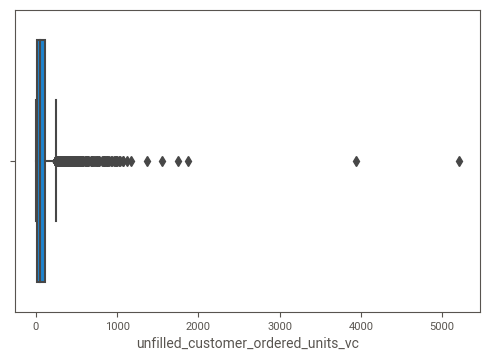

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


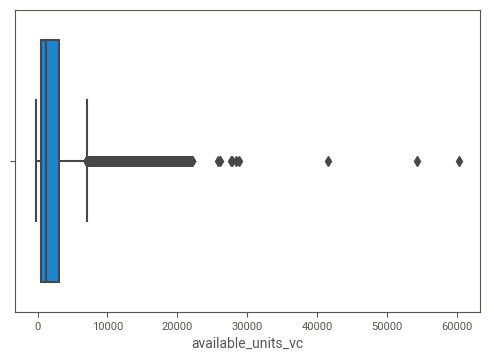

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


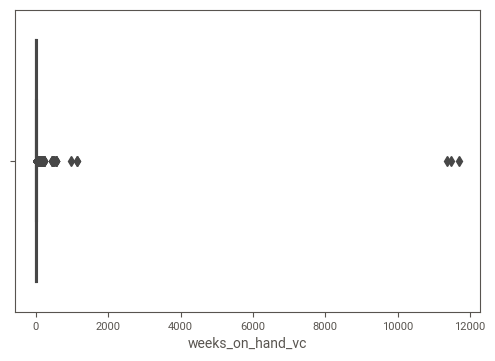

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


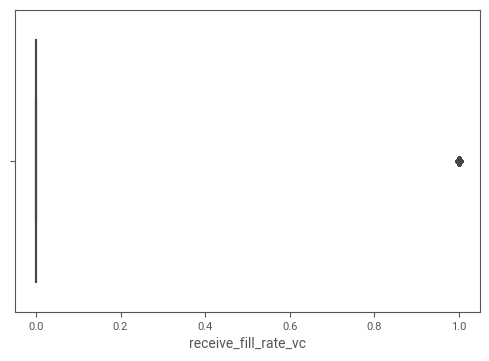

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


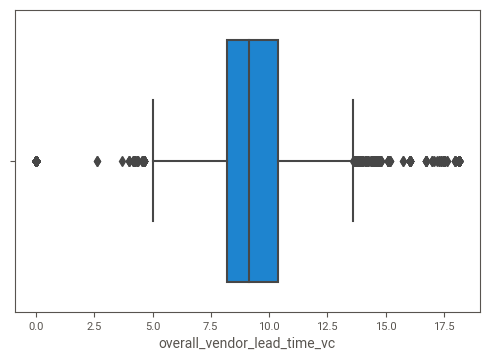

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


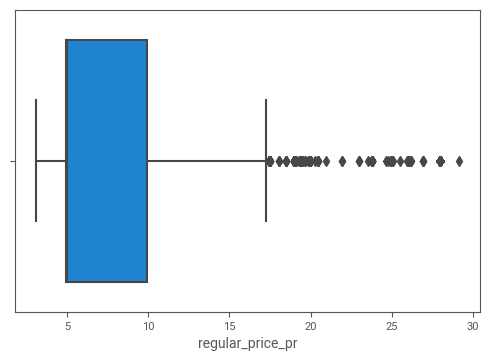

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


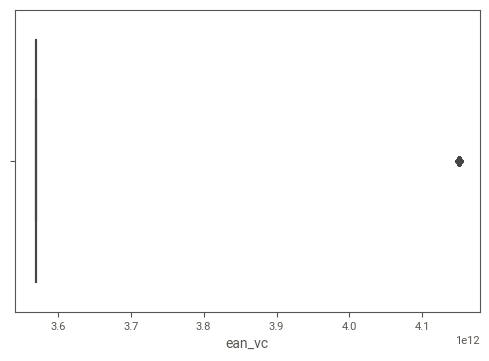

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


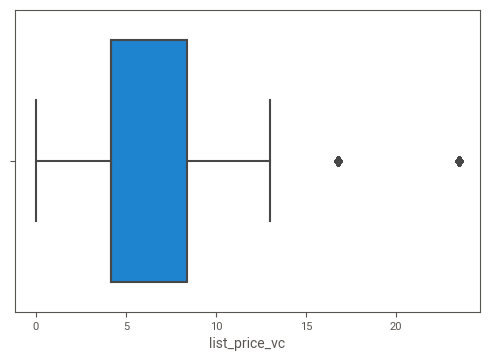

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


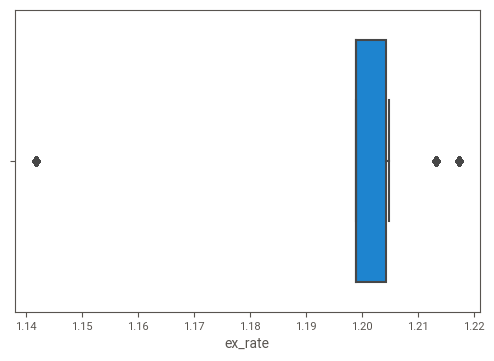

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


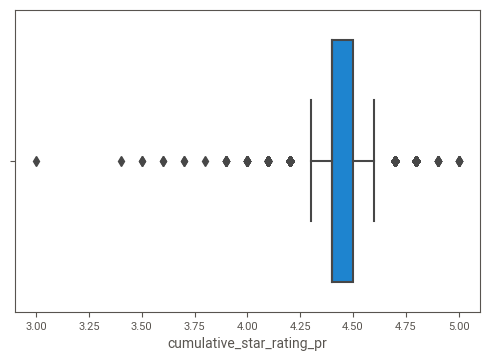

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


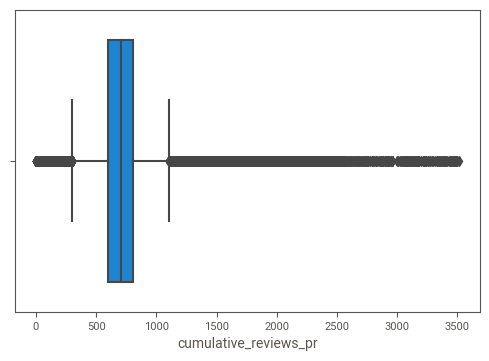

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


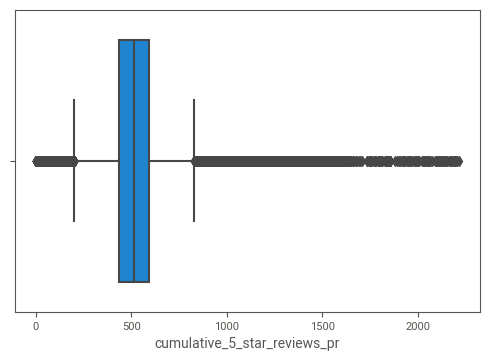

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


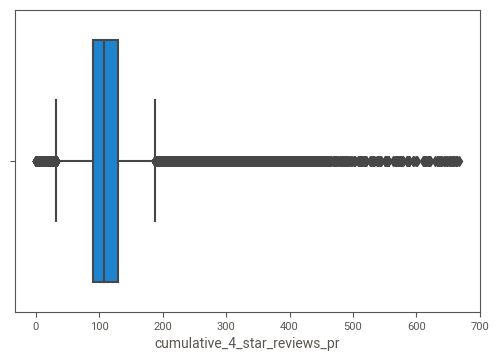

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


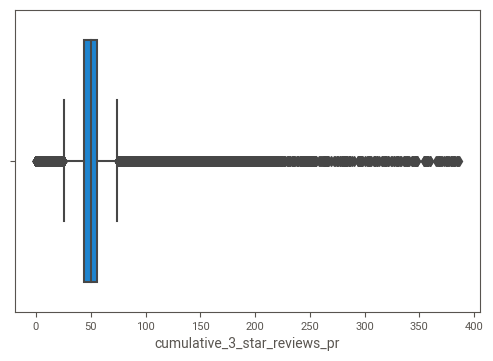

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


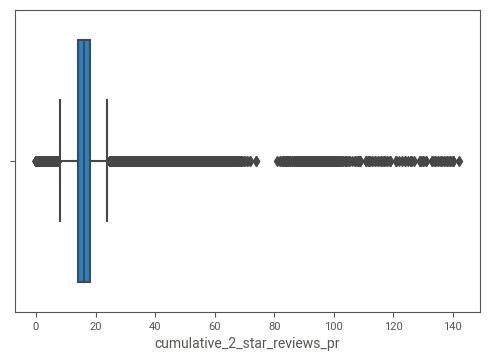

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


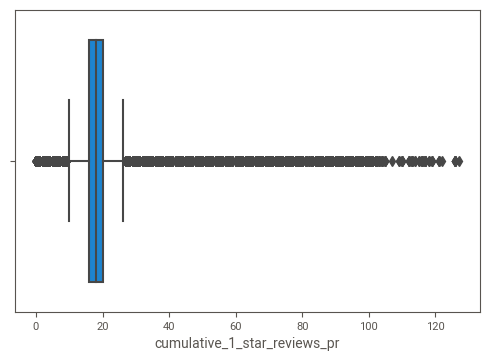

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


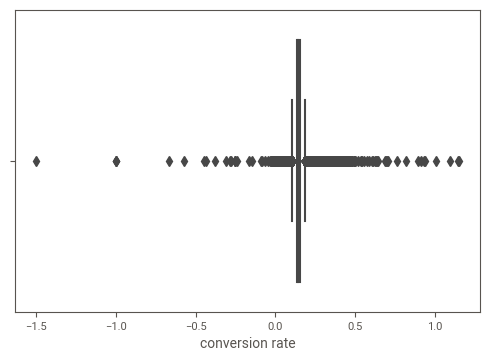

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


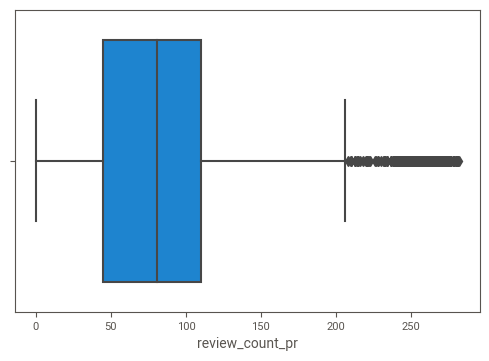

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


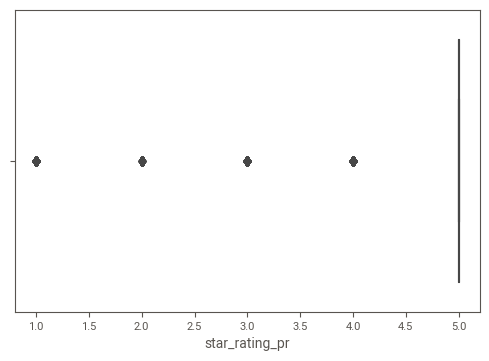

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


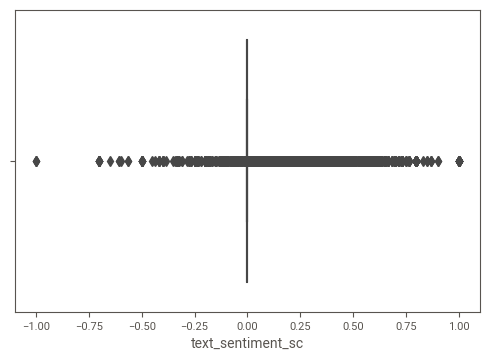

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


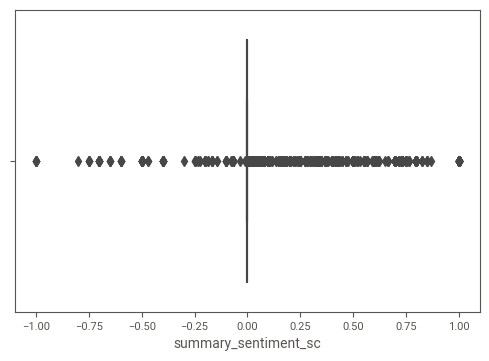

In [101]:
#Checking for ouliers before treatment
for i in df_numerical[1:]:
    sns.boxplot(df_numerical[i])
    plt.pause(.05)

In [118]:

# Can skip this step to see if model is givinng better results with outlier treatment or without
#df_numerical=df_numerical.apply(lambda x: outlier_capping(x))

In [182]:
#Checking for ouliers after treatment   all except first_party_ordered_sales_vc,first_party_ordered_sales_local_va
# first_party_shipped_sales_vc, customer_return_vc,shipped_subcategory_sales_rank_vc,ordered_subcategory_sales_rank
# conversion_rate_vc,unfilled_customer_ordered_units_vc,ean_vc,cumulative_star_rating_pr
#for i in df_numerical[1:]:
  #  sns.boxplot(df_numerical[i])
   # plt.pause(.05)

#Filling missing values in categorical features with mode

In [102]:
df_categorical=df_categorical.apply(lambda x: x.fillna(x.mode().iloc[0]))

In [103]:
df_categorical.isnull().sum()

date                                 0
asin                                 0
gsr_level_2                          0
availability_pr                      0
third_party_seller_pr                0
product_group_vc                     0
replenishment_code_vc                0
colour_vc                            0
prep_instructions_required_vc        0
prep_instructions_vendor_state_vc    0
sponsored_pr                         0
third_party_only_pr                  0
amazon_choice_pr                     0
amazon_bestseller_pr                 0
amazon_subscribe_and_save_pr         0
amazon_prime_pr                      0
amazon_addon_item_pr                 0
condition_pr                         0
customer_product_pr                  0
free_replacements_vc                 0
first_party_won_buy_box_pr           0
colour_count_vc                      0
number_of_images_pr                  0
isinventory_vc                       0
useful_ratings_negative              0
useful_ratings_positive  

In [104]:
df_categorical.shape

(14356, 29)

Variables that have to cleaned: prep_instructions_vendor_state_vc, prep_instructions_required_vc and
 colour_vc

In [105]:
df_categorical.colour_vc.value_counts()

-        13453
Black      827
White       76
Name: colour_vc, dtype: int64

In [106]:
df_categorical.prep_instructions_required_vc.value_counts()

-                        13257
Bagging, Set creation      551
Set creation, Bagging      548
Name: prep_instructions_required_vc, dtype: int64

In [107]:
df_categorical.prep_instructions_vendor_state_vc.value_counts()

Amazon            13139
Vendor              551
-                   359
CPEX Certified      307
Name: prep_instructions_vendor_state_vc, dtype: int64

In [108]:
df_categorical.prep_instructions_vendor_state_vc.value_counts()

Amazon            13139
Vendor              551
-                   359
CPEX Certified      307
Name: prep_instructions_vendor_state_vc, dtype: int64

In [109]:
df_categorical.head()

date        asin      gsr_level_2 availability_pr  \
0  20-12-2020  B000W6PY1W  Acne Treatments               Y   
1  20-12-2020  B071936B11        Cleansers               Y   
2  20-12-2020  B075KJBF9H     Moisturisers               Y   
3  20-12-2020  B07BVW522M     Moisturisers               Y   
4  20-12-2020  B07JMXSSYN        Cleansers               Y   

  third_party_seller_pr product_group_vc replenishment_code_vc colour_vc  \
0                amazon           Beauty                    PR         -   
1                amazon           Beauty                    PR         -   
2                amazon           Beauty                    PR         -   
3                amazon           Beauty                    PR         -   
4                amazon           Beauty                    PR         -   

  prep_instructions_required_vc prep_instructions_vendor_state_vc  \
0                             -                            Amazon   
1                             -                            Vendor   
2         Set creation, Bagging                            Amazon   
3                             -                            Amazon   
4         Bagging, Set creation                            Amazon   

   sponsored_pr  third_party_only_pr  amazon_choice_pr  amazon_bestseller_pr  \
0         False                 True             False                 False   
1         False                 True             False                 False   
2         False                 True             False                 False   
3         False                 True             False                 False   
4         False                 True             False                 False   

   amazon_subscribe_and_save_pr  amazon_prime_pr  amazon_addon_item_pr  \
0                         False            False                 False   
1                         False            False                 False   
2                         False            False                 False   
3                         False            False                 False   
4                         False            False                 False   

  condition_pr  customer_product_pr  free_replacements_vc  \
0            Y                False                     0   
1            Y                 True                     0   
2            Y                 True                     0   
3            Y                 True                     0   
4            Y                 True                     0   

   first_party_won_buy_box_pr  colour_count_vc  number_of_images_pr  \
0                         1.0              0.0                  7.0   
1                         1.0              1.0                  7.0   
2                         1.0              1.0                  7.0   
3                         1.0              1.0                  7.0   
4                         1.0              0.0                  7.0   

   isinventory_vc  useful_ratings_negative  useful_ratings_positive  \
0            True                        0                        4   
1            True                        0                        3   
2            True                        2                        0   
3            True                        0                        4   
4            True                        0                        4   

   feature_wise_rating  qna_answered  item_to_consider  
0                    1             7                 1  
1                    1             9                 1  
2                    1             0                 1  
3                    1             6                 1  
4                    1             0                 1

In [111]:
df_categorical['third_party_seller_pr']=df_categorical['third_party_seller_pr'].astype(str)
df_categorical['product_group_vc']=df_categorical['product_group_vc'].astype(str)
df_categorical['replenishment_code_vc']=df_categorical['replenishment_code_vc'].astype(str)
df_categorical['prep_instructions_vendor_state_vc']=df_categorical['prep_instructions_vendor_state_vc'].astype(str)
df_categorical['prep_instructions_required_vc']=df_categorical['prep_instructions_required_vc'].astype(str)
df_categorical['prep_instructions_vendor_state_vc']=df_categorical['prep_instructions_vendor_state_vc'].astype(str)

In [112]:

df_categorical['colour_vc'].replace({'UNKNOWN':'-','Blau':'Black', 'blau':'Black', 'white':'White'},inplace=True)
df_categorical['colour_vc']=df_categorical['colour_vc'].astype(str)

In [113]:
df_categorical['gsr_level_2'].replace({'Acne Treatments':1,'Cleansers':2,'Moisturisers':3},inplace=True)
df_categorical['availability_pr'].replace({'Y':1,'N':0,'D':2},inplace=True)

df_categorical['sponsored_pr'].replace({True:1,False:0},inplace=True)
df_categorical['third_party_only_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_bestseller_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_subscribe_and_save_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_choice_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_bestseller_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_subscribe_and_save_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_prime_pr'].replace({True:1,False:0},inplace=True)
df_categorical['amazon_addon_item_pr'].replace({True:1,False:0},inplace=True)
df_categorical['condition_pr'].replace({'Y':1,'N':0},inplace=True)
df_categorical['amazon_choice_pr'].replace({True:1,False:0},inplace=True)
df_categorical['customer_product_pr'].replace({True:1,False:0},inplace=True)
df_categorical['isinventory_vc'].replace({True:1,False:0},inplace=True)


In [131]:
#df_categorical['prep_instructions_vendor_state_vc'].replace({'Amazon':1,'Vendor':2,'CPEX Certified':3},inplace=True)

In [114]:
df_categorical.head()

date        asin  gsr_level_2  availability_pr third_party_seller_pr  \
0  20-12-2020  B000W6PY1W            1                1                amazon   
1  20-12-2020  B071936B11            2                1                amazon   
2  20-12-2020  B075KJBF9H            3                1                amazon   
3  20-12-2020  B07BVW522M            3                1                amazon   
4  20-12-2020  B07JMXSSYN            2                1                amazon   

  product_group_vc replenishment_code_vc colour_vc  \
0           Beauty                    PR         -   
1           Beauty                    PR         -   
2           Beauty                    PR         -   
3           Beauty                    PR         -   
4           Beauty                    PR         -   

  prep_instructions_required_vc prep_instructions_vendor_state_vc  \
0                             -                            Amazon   
1                             -                            Vendor   
2         Set creation, Bagging                            Amazon   
3                             -                            Amazon   
4         Bagging, Set creation                            Amazon   

   sponsored_pr  third_party_only_pr  amazon_choice_pr  amazon_bestseller_pr  \
0             0                    1                 0                     0   
1             0                    1                 0                     0   
2             0                    1                 0                     0   
3             0                    1                 0                     0   
4             0                    1                 0                     0   

   amazon_subscribe_and_save_pr  amazon_prime_pr  amazon_addon_item_pr  \
0                             0                0                     0   
1                             0                0                     0   
2                             0                0                     0   
3                             0                0                     0   
4                             0                0                     0   

   condition_pr  customer_product_pr  free_replacements_vc  \
0             1                    0                     0   
1             1                    1                     0   
2             1                    1                     0   
3             1                    1                     0   
4             1                    1                     0   

   first_party_won_buy_box_pr  colour_count_vc  number_of_images_pr  \
0                         1.0              0.0                  7.0   
1                         1.0              1.0                  7.0   
2                         1.0              1.0                  7.0   
3                         1.0              1.0                  7.0   
4                         1.0              0.0                  7.0   

   isinventory_vc  useful_ratings_negative  useful_ratings_positive  \
0               1                        0                        4   
1               1                        0                        3   
2               1                        2                        0   
3               1                        0                        4   
4               1                        0                        4   

   feature_wise_rating  qna_answered  item_to_consider  
0                    1             7                 1  
1                    1             9                 1  
2                    1             0                 1  
3                    1             6                 1  
4                    1             0                 1

In [116]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14356 entries, 0 to 14355
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               14356 non-null  object 
 1   asin                               14356 non-null  object 
 2   gsr_level_2                        14356 non-null  int64  
 3   availability_pr                    14356 non-null  int64  
 4   third_party_seller_pr              14356 non-null  object 
 5   product_group_vc                   14356 non-null  object 
 6   replenishment_code_vc              14356 non-null  object 
 7   colour_vc                          14356 non-null  object 
 8   prep_instructions_required_vc      14356 non-null  object 
 9   prep_instructions_vendor_state_vc  14356 non-null  object 
 10  sponsored_pr                       14356 non-null  int64  
 11  third_party_only_pr                14356 non-null  int

In [117]:
df_categorical.drop(['asin','date'],axis=1,inplace=True)

In [118]:
df_categorical['condition_pr'].value_counts()

1    14191
0      165
Name: condition_pr, dtype: int64

In [119]:
data_new = pd.concat([df_numerical, df_categorical], axis=1)

In [120]:
data_new.shape

(14356, 80)

In [121]:
data_new.drop(['year','weeknum','fiscal_year','fiscal_month'],axis=1,inplace=True)

In [122]:
data_new.shape

(14356, 76)

In [123]:
data_new.head()

first_party_ordered_sales_vc  first_party_ordered_sales_local_vc  \
0                         240.7                              210.85   
1                         197.6                              173.04   
2                         326.9                              286.26   
3                         227.5                              199.25   
4                          14.7                               12.91   

   first_party_ordered_units_vc  average_sales_price_vc  \
0                            59                     3.6   
1                            14                    12.4   
2                            18                    15.9   
3                            25                     8.0   
4                             1                    12.9   

   first_party_shipped_sales_vc  shipped_cogs_amount_vc  \
0                         33.95                   47.67   
1                        119.85                  107.40   
2                         59.05                   59.44   
3                        127.91                  145.28   
4                         38.73                   34.07   

   first_party_shipped_units_vc  customer_return_vc  \
0                             9                   0   
1                            10                   0   
2                             4                   0   
3                            16                   0   
4                             3                   0   

   shipped_subcategory_sales_rank_vc  ordered_subcategory_sales_rank_vc  \
0                              550.0                              172.0   
1                              165.0                              289.0   
2                              343.0                             2246.0   
3                              151.0                              209.0   
4                              505.0                             1148.0   

   replenishable_out_of_stock_vc  glance_views_vc  conversion_rate_vc  \
0                         0.0000              362              0.1630   
1                         0.0000               83              0.1687   
2                         0.0000              114              0.1579   
3                         0.0144              341              0.0733   
4                         0.0000               19              0.0526   

   net_received_amount_vc  net_received_units_vc  \
0                     0.0                    0.0   
1                     0.0                    0.0   
2                     0.0                    0.0   
3                     0.0                    0.0   
4                     0.0                    0.0   

   open_purchase_order_quantity_vc  sellable_on_hand_inventory_amount_vc  \
0                              0.0                                   0.0   
1                              0.0                                   0.0   
2                              0.0                                   0.0   
3                              0.0                                   0.0   
4                              0.0                                   0.0   

   sellable_on_hand_amount_trailing_30_day_average_amount_vc  \
0                                                0.0           
1                                                0.0           
2                                                0.0           
3                                                0.0           
4                                                0.0           

   sellable_on_hand_units_vc  unsellable_on_hand_inventory_amount_vc  \
0                        0.0                                     0.0   
1                        0.0                                     0.0   
2                        0.0                                     0.0   
3                        0.0                                     0.0   
4                        0.0                                     0.0   

   unsellable_on_hand_amount_trailing_30_day_average_amou

In [183]:
data_new.index.max()

14355

# Model 1 Using AutoML: LGBM

In [150]:
#X = data_new.drop('conversion_rate_vc',axis=1).values
#y =data_new.conversion_rate_vc.values

In [124]:
X=data_new.drop('conversion_rate_vc',axis=1)
y=data_new.conversion_rate_vc

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [157]:
from sklearn.metrics import max_error, mean_absolute_error,mean_squared_log_error, mean_squared_error, r2_score
from flaml.ml import sklearn_metric_loss_score
from flaml.data import get_output_from_log

In [126]:
from flaml import AutoML
automl_model=AutoML()

In [152]:
automl_model.fit(x_train,y_train, task="regression",time_budget=60, estimator_list=['rf'])

[flaml.automl: 11-16 12:00:03] {2600} INFO - task = regression
[flaml.automl: 11-16 12:00:03] {2602} INFO - Data split method: uniform
[flaml.automl: 11-16 12:00:03] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-16 12:00:03] {2727} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-16 12:00:03] {2869} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 11-16 12:00:04] {3164} INFO - iteration 0, current learner rf
[flaml.automl: 11-16 12:00:04] {3297} INFO - Estimated sufficient time budget=2533s. Estimated necessary time budget=3s.
[flaml.automl: 11-16 12:00:04] {3344} INFO -  at 0.6s,	estimator rf's best error=0.5934,	best estimator rf's best error=0.5934
[flaml.automl: 11-16 12:00:04] {3164} INFO - iteration 1, current learner rf
[flaml.automl: 11-16 12:00:04] {3344} INFO -  at 0.9s,	estimator rf's best error=0.3093,	best estimator rf's best error=0.3093
[flaml.automl: 11-16 12:00:04] {3164} INFO - iteration 2, current learner rf
[flaml.automl: 11-16 12:0

[flaml.automl: 11-16 12:00:31] {3164} INFO - iteration 38, current learner rf
[flaml.automl: 11-16 12:00:32] {3344} INFO -  at 29.0s,	estimator rf's best error=0.0758,	best estimator rf's best error=0.0758
[flaml.automl: 11-16 12:00:32] {3164} INFO - iteration 39, current learner rf
[flaml.automl: 11-16 12:00:33] {3344} INFO -  at 29.7s,	estimator rf's best error=0.0758,	best estimator rf's best error=0.0758
[flaml.automl: 11-16 12:00:33] {3164} INFO - iteration 40, current learner rf
[flaml.automl: 11-16 12:00:34] {3344} INFO -  at 30.8s,	estimator rf's best error=0.0758,	best estimator rf's best error=0.0758
[flaml.automl: 11-16 12:00:34] {3164} INFO - iteration 41, current learner rf
[flaml.automl: 11-16 12:00:35] {3344} INFO -  at 31.4s,	estimator rf's best error=0.0758,	best estimator rf's best error=0.0758
[flaml.automl: 11-16 12:00:35] {3164} INFO - iteration 42, current learner rf
[flaml.automl: 11-16 12:00:35] {3344} INFO -  at 32.2s,	estimator rf's best error=0.0758,	best est

In [153]:
print(automl_model.best_loss)

0.07473772572428683


In [154]:
y_pred=automl_model.predict(x_test)
y_pred_tr=automl_model.predict(x_train)

In [155]:
 print("r2 score :" ,r2_score(y_test,y_pred))

r2 score : 0.8787775563251604


In [156]:
 print("r2 score :" ,r2_score(y_train,y_pred_tr))

r2 score : 0.9893223630823451


# AUTOML with Multiple Models

In [172]:
automl = AutoML()

settings = {
    "time_budget": 15,  # seconds
    "metric": 'r2', # metric used for the evaluation
    "task": 'regression', # type of the task
    "log_file_name": "./penguins.log", # location of the log
}

automl.fit(x_train, y_train,
           **settings)

[flaml.automl: 11-16 12:12:38] {2600} INFO - task = regression
[flaml.automl: 11-16 12:12:38] {2602} INFO - Data split method: uniform
[flaml.automl: 11-16 12:12:38] {2605} INFO - Evaluation method: holdout
[flaml.automl: 11-16 12:12:38] {2727} INFO - Minimizing error metric: 1-r2
[flaml.automl: 11-16 12:12:38] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 11-16 12:12:38] {3164} INFO - iteration 0, current learner lgbm
[flaml.automl: 11-16 12:12:38] {3297} INFO - Estimated sufficient time budget=918s. Estimated necessary time budget=6s.
[flaml.automl: 11-16 12:12:38] {3344} INFO -  at 0.3s,	estimator lgbm's best error=0.7678,	best estimator lgbm's best error=0.7678
[flaml.automl: 11-16 12:12:38] {3164} INFO - iteration 1, current learner lgbm
[flaml.automl: 11-16 12:12:39] {3344} INFO -  at 0.4s,	estimator lgbm's best error=0.7678,	best estimator lgbm's best error=0.7678
[flaml.automl: 11-16 12:12:39] {3164} IN

[flaml.automl: 11-16 12:12:47] {3164} INFO - iteration 36, current learner extra_tree
[flaml.automl: 11-16 12:12:47] {3344} INFO -  at 9.0s,	estimator extra_tree's best error=0.1459,	best estimator lgbm's best error=0.0741
[flaml.automl: 11-16 12:12:47] {3164} INFO - iteration 37, current learner xgboost
[flaml.automl: 11-16 12:12:47] {3344} INFO -  at 9.2s,	estimator xgboost's best error=0.1961,	best estimator lgbm's best error=0.0741
[flaml.automl: 11-16 12:12:47] {3164} INFO - iteration 38, current learner xgboost
[flaml.automl: 11-16 12:12:48] {3344} INFO -  at 9.3s,	estimator xgboost's best error=0.1961,	best estimator lgbm's best error=0.0741
[flaml.automl: 11-16 12:12:48] {3164} INFO - iteration 39, current learner rf
[flaml.automl: 11-16 12:12:48] {3344} INFO -  at 10.0s,	estimator rf's best error=0.1065,	best estimator lgbm's best error=0.0741
[flaml.automl: 11-16 12:12:48] {3164} INFO - iteration 40, current learner rf
[flaml.automl: 11-16 12:12:49] {3344} INFO -  at 10.4s,	e

In [173]:
print('Best Machine Learning Algorithm:', automl.best_estimator)
print('Best hyperparmeter configuration:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best Machine Learning Algorithm: lgbm
Best hyperparmeter configuration: {'n_estimators': 104, 'num_leaves': 16, 'min_child_samples': 3, 'learning_rate': 0.17402065726724145, 'log_max_bin': 8, 'colsample_bytree': 0.6649148062238498, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.006761362450996489}
Best accuracy on validation data: 0.9259
Training duration of best run: 0.4019 s


In [174]:
automl.model.estimator

LGBMRegressor(colsample_bytree=0.6649148062238498,
              learning_rate=0.17402065726724145, max_bin=255,
              min_child_samples=3, n_estimators=104, num_leaves=16,
              reg_alpha=0.0009765625, reg_lambda=0.006761362450996489,
              verbose=-1)

In [177]:
y_pred_ts= automl.predict(x_test)
y_pred_tr=automl.predict(x_train)

In [180]:
test_accuracy = 1 - sklearn_metric_loss_score('r2', y_pred_ts, y_test)
print(f'Accuracy on test data: {test_accuracy}')

Accuracy on test data: 0.8655763477618479


In [181]:
train_accuracy = 1 - sklearn_metric_loss_score('r2', y_pred_tr, y_train)
print(f'Accuracy on train data: {train_accuracy}')

Accuracy on train data: 0.9918370714563676


In [ ]:
import pickle
with open('automl.pkl', 'wb') as f:
    pickle.dump(automl, f, pickle.HIGHEST_PROTOCOL)

# Feature Importance using AutoML

In [164]:
import matplotlib.axes as ax
import matplotlib.pyplot as plt

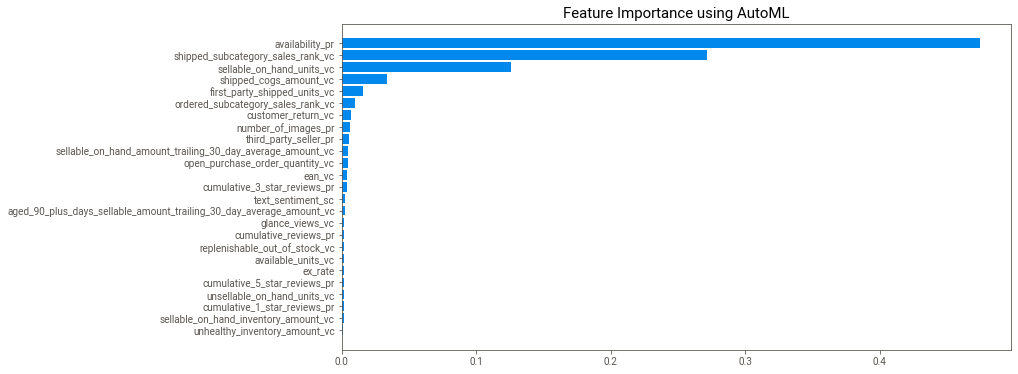

In [170]:
feature_importance=automl_model.feature_importances_
sorted_idx=np.argsort(feature_importance)[-25:]
#fig,ax = plt.subplots()
fig=plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx],align='center')
plt.xticks(fontsize=10)
plt.yticks(range(len(sorted_idx)), np.array(x_train.columns)[sorted_idx],fontsize=10)
plt.title('Feature Importance using AutoML',fontsize=15)
plt.show()

You can use these features and run the model again using AutoML to see what the accuracy scores are